In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('data.csv')
df.head(5)

Saving data.csv to data (1).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

df.isnull()

df.dropna(axis=1,inplace=True)

In [ ]:
df.shape
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

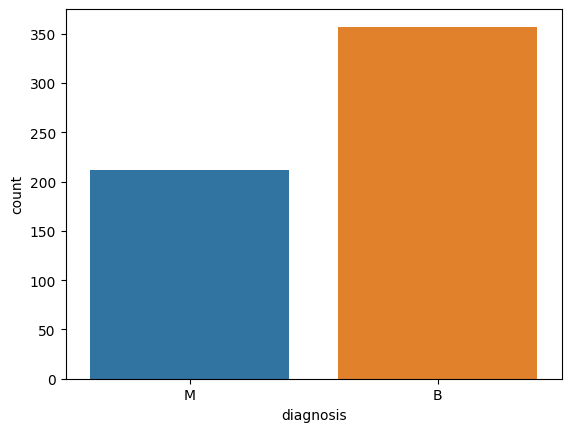

In [ ]:
sns.countplot(x=df['diagnosis'],label='count')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_y=LabelEncoder()
df.iloc[:,1]=labelEncoder_y.fit_transform(df.iloc[:,1].values)
df.head()

<ipython-input-27-6fc2e3a616b6>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1]=labelEncoder_y.fit_transform(df.iloc[:,1].values)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

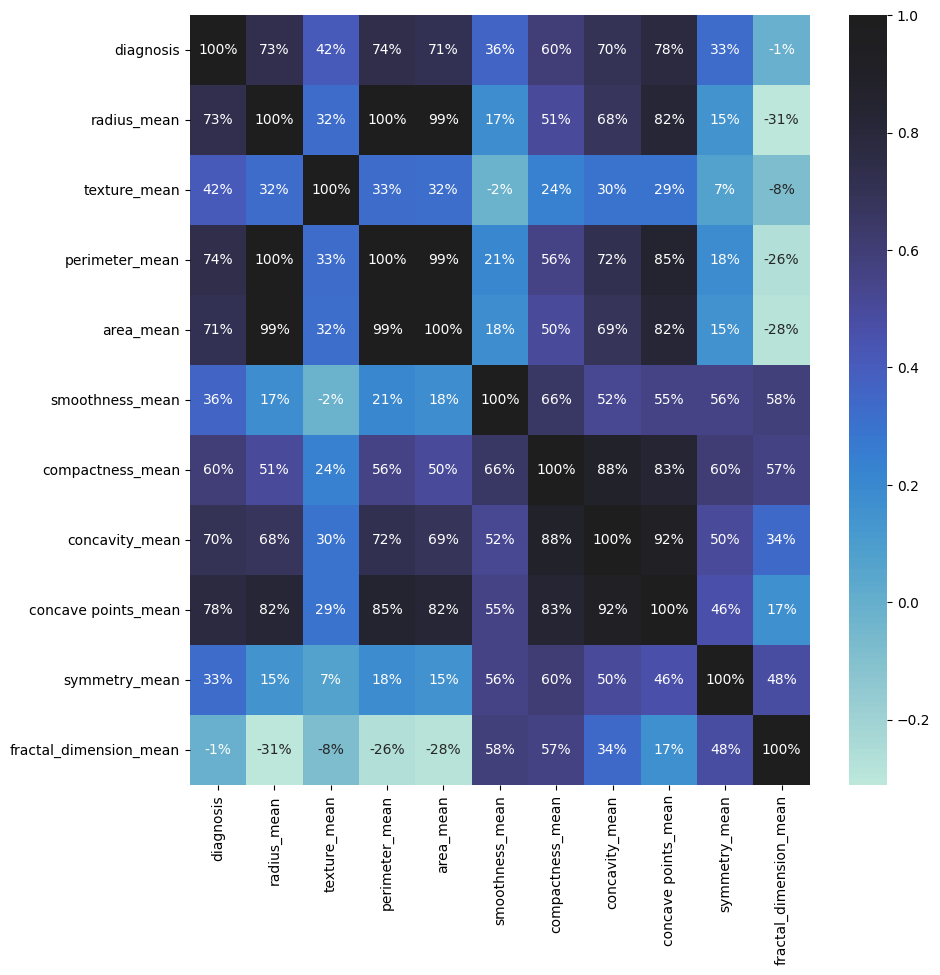

In [ ]:
df.iloc[:,1:12].corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True, fmt='.0%',center=1)

In [ ]:
x=df.iloc[:,2:31]
y=df.iloc[:,1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

x_train

array([[-0.74998027, -1.09978744, -0.74158608, ..., -0.04627198,
        -0.6235968 ,  0.07754241],
       [-1.02821446, -0.1392617 , -1.02980434, ..., -0.95489389,
        -0.7612376 , -1.07145262],
       [-0.53852228, -0.29934933, -0.56857428, ..., -0.38460243,
        -0.50470441,  0.34900827],
       ...,
       [-1.3214733 , -0.20855336, -1.3143845 , ..., -0.79857797,
        -0.98621857, -0.69108476],
       [-1.24245479, -0.23244704, -1.27759928, ..., -1.3913039 ,
        -1.7562754 , -1.55125275],
       [-0.74441558,  1.13188181, -0.72016173, ...,  0.48946107,
        -0.28490593, -1.2308599 ]])

In [ ]:
def models(x_train,y_train):

  log=LogisticRegression(random_state=0)
  log.fit(x_train,y_train)

  tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
  tree.fit(x_train,y_train)

  forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  forest.fit(x_train,y_train)

  print("LOGISTIC==> ",log.score(x_train,y_train))
  print("DECISION==> ",tree.score(x_train,y_train))
  print("RANDOM_FOREST==> ",forest.score(x_train,y_train))

  return log,tree,forest

In [ ]:
model=models(x_train,y_train)

LOGISTIC==>  0.9899497487437185
DECISION==>  1.0
RANDOM_FOREST==>  0.9949748743718593


In [ ]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):

  print("model no->",i+1)
  cm=confusion_matrix(y_test,model[i].predict(x_test))

  tn=cm[0][0]
  tp=cm[1][1]
  fn=cm[1][0]
  fp=cm[0][1]

  print(cm)
  print("Score==>", (tp+tn)/(tp+tn+fn+fp) )
  print()

model no-> 1
[[104   4]
 [  2  61]]
Score==> 0.9649122807017544

model no-> 2
[[102   6]
 [  4  59]]
Score==> 0.9415204678362573

model no-> 3
[[106   2]
 [  5  58]]
Score==> 0.9590643274853801



In [ ]:
results_for_best=model[2].predict(x_test)
print(results_for_best)
results_for_best.shape

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0]


(171,)

In [ ]:
y_ts=np.array(y_test)
y_ts

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
count=0
for i in range(len(results_for_best)):
  if( results_for_best[i]!=y_ts[i] ):
      count=count+1
      print(i)

print(count)

13
73
91
137
147
151
157
7
